---
title: Working with pyCATHY and DA
subtitle: Testing
license: CC-BY-4.0
github: https://github.com/BenjMy/ETH_pyCATHY/
subject: Tutorial
authors:
  - name: Benjamin Mary
    email: benjamin.mary@ica.csic.es
    corresponding: true
    orcid: 0000-0001-7199-2885
    affiliations:
      - ICA-CSIC
date: 2024/04/12
---

In [10]:
import pyCATHY
from pyCATHY import cathy_tools
import pygimli as pg

## pygimli ERT forward modelling 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli.meshtools as mt
from pygimli.physics import ert

(<Axes: >, None)

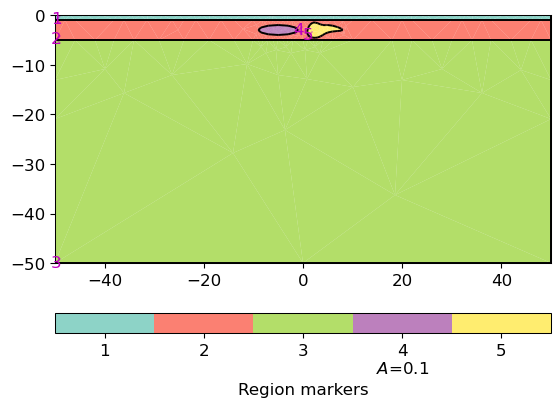

In [5]:
world = mt.createWorld(start=[-50, 0], end=[50, -50], layers=[-1, -5],
                       worldMarker=True)
block = mt.createCircle(pos=[-5, -3.], radius=[4, 1], marker=4,
                        boundaryMarker=10, area=0.1)
poly = mt.createPolygon([(1,-4), (2,-1.5), (4,-2), (5,-2),
                         (8,-3), (5,-3.5), (3,-4.5)], isClosed=True,
                         addNodes=3, interpolate='spline', marker=5)
geom = world + block + poly
pg.show(geom)


12/04/24 - 09:28:39 - pyGIMLi - INFO - Data error estimate (min:max)  0.010000294838286121 : 0.01056761917552525
12/04/24 - 09:28:39 - pyGIMLi - INFO - 0.13172095457607066 956.0725038881353
12/04/24 - 09:28:39 - pyGIMLi - INFO - Simulated data Data: Sensors: 21 data: 171, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']
12/04/24 - 09:28:39 - pyGIMLi - INFO - The data contains: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
12/04/24 - 09:28:39 - pyGIMLi - INFO - Simulated rhoa (min/max) 42.792496044211 104.19891011722967
12/04/24 - 09:28:39 - pyGIMLi - INFO - Selected data noise %(min/max) 1.0000294838286121 1.056761917552525


ModellingBase::setMesh() copying new mesh ... Found datafile: 21 electrodes
Found: 21 free-electrodes
rMin = 0.75, rMax = 60
NGauLeg + NGauLag for inverse Fouriertransformation: 11 + 4
Found non-Neumann domain
0.0100875 s
FOP updating mesh dependencies ... 1.248e-06 s
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Calculating response for model: min = 25 max = 150
Allocating memory for primary potential...... 0.000917722

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 0.0952119s
Response: min = 43.6475 max = 102.718 mean = 71.3742
Reciprocity rms(modelReciprocity) 0.140597%, max: 0.449979%


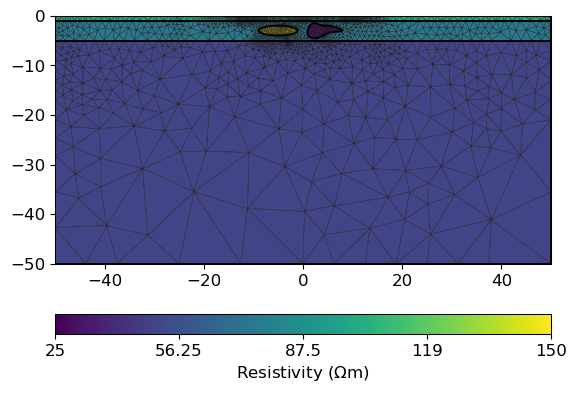

In [6]:
scheme = ert.createData(elecs=np.linspace(start=-15, stop=15, num=21),
                           schemeName='dd')
for p in scheme.sensors():
    geom.createNode(p)
    geom.createNode(p - [0, 0.1])

# Create a mesh for the finite element modelling with appropriate mesh quality.
mesh = mt.createMesh(geom, quality=34)

# Create a map to set resistivity values in the appropriate regions
# [[regionNumber, resistivity], [regionNumber, resistivity], [...]
rhomap = [[1, 100.],
          [2, 75.],
          [3, 50.],
          [4, 150.],
          [5, 25]]

# Take a look at the mesh and the resistivity distribution
pg.show(mesh, data=rhomap, label=pg.unit('res'), showMesh=True)

data = ert.simulate(mesh, scheme=scheme, res=rhomap, noiseLevel=1,
                    noiseAbs=1e-6, seed=1337)

pg.info(np.linalg.norm(data['err']), np.linalg.norm(data['rhoa']))
pg.info('Simulated data', data)
pg.info('The data contains:', data.dataMap().keys())

pg.info('Simulated rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))
pg.info('Selected data noise %(min/max)', min(data['err'])*100, max(data['err'])*100)

12/04/24 - 09:29:00 - pyGIMLi - INFO - Filtered rhoa (min/max) 42.792496044211 104.19891011722967


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f93a3a10490>)

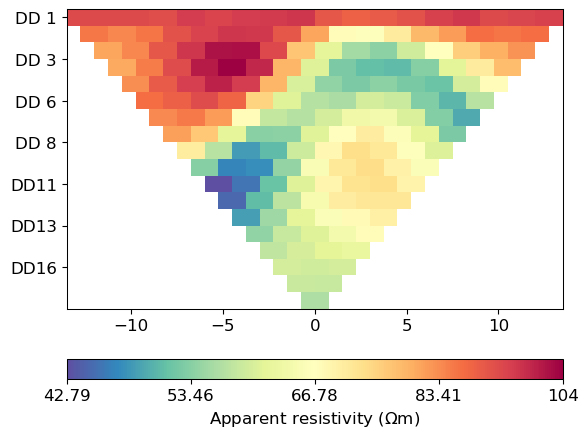

In [7]:
data.remove(data['rhoa'] < 0)
pg.info('Filtered rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))

# You can save the data for further use
data.save('simple.dat')

# You can take a look at the data
ert.show(data)

## pyCATHY forward modelling 

In [11]:
path2prj = "."  # add your local path here
simu = cathy_tools.CATHY(dirName=path2prj,
                    prj_name="weill_exemple"
                    )

🏁 Initiate CATHY object

😟 src files not found

working directory is:/home/z0272571a@CAMPUS.CSIC.ES/Nextcloud/BenCSIC/Codes/BenjMy/pycathy_wrapper/.

📥 Fetch cathy src files

📥 Fetch cathy prepro src files

📥 Fetch cathy inputfiles